<h1> Linear regression

## Question 2
For the next exercise, you are going to use the Airline Costs dataset available to download from airline_costs_new.csv The dataset has the following attributes, among others:
<ol>
<li>Airline name</li>
<li>Length of flight in miles
</li>
<li>Speed of plane in miles per hour
</li>
<li>Daily flight time per plane in hours
</li>
<li>Customers served in 1000s
</li>
<li>Total operating cost in cents per revenue ton-mile
</li>
<li>Total assets in 100,000s </li>
<li>Investments and special funds in 100,000s
</li>
</ol>


Use a linear regression model to predict the number of customers each airline serves from its length of flight and daily flight time per plane. 

Next, build another regression model to predict the total assets of an airline from the customers served by the airline. 

Do you have any insight about the data from the last two regression models?

### Part a
Simple Linear Regression Math by Hand

There are just a handful of steps in linear regression.
<ul>
    <li>Step 1: Calculate X*Y, X<sup>2</sup>, and Y<sup>2</sup></li>
    <li>Step 2: Calculate ΣX, ΣY, ΣX*Y, ΣX<sup>2</sup>, and ΣY<sup>2</sup></li>
    <li>Step 3: Calculate b<sub>0</sub></li>
    <li>Step 4: Calculate b<sub>1</sub></li>
    <li>Step 5: Place b<sub>0</sub> and b<sub>1</sub> in the estimated linear regression equation.</li>
</ul>

The estimated linear regression equation is: ŷ = b<sub>0</sub> + b<sub>1</sub>*x

The formula to calculate b<sub>0</sub> is: [(ΣY)(ΣX<sup>2</sup>) – (ΣX)(ΣX*Y)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]

The formula to calculate b<sub>1</sub> is: [n(ΣXY) – (ΣX)(ΣY)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]



In [30]:
#Type the answers from your manual calculations here.
import pandas as pd

# step 1
df = pd.read_csv('airline_costs.csv')
X = df['Population']
Y = df['Adjusted_assets']
XY = X * Y
xSqr = X**2
ySqr = Y**2

In [31]:
# step 2
sumOfXs = X.sum()
sumOfYs = Y.sum()
sumXsByYs = XY.sum()
sumOfSqrXs = (X**2).sum()
sumOfSqrYs = (Y**2).sum()
n = len(df)

In [32]:
# step 3 & 4
b0 = ((sumOfYs * sumOfSqrXs) - (sumOfXs * sumXsByYs)) / ((n * sumOfSqrXs) - ((sumOfXs)**2))
b1 = ((n * sumXsByYs) - (sumOfXs * sumOfYs)) / ((n * sumOfSqrXs) - ((sumOfXs)**2))
b0

-84.82573222607547

In [33]:
 # step 5

linearRegression = b0 + b1 * X
linearRegression

0      305.214276
1     1014.391969
2      -81.292201
3      144.351736
4      708.712594
5      -50.899975
6      262.734671
7      175.844570
8      -10.853293
9      168.487875
10     764.766364
11     -76.117413
12     -36.553454
13      19.538933
14      45.026696
15      93.781697
16     367.601368
17     224.116848
18     436.514872
19     -19.909173
20     -45.242464
21     -39.700807
22      14.479998
23     -34.622563
24     909.583198
25     859.631045
26     -49.104246
27      35.854963
28     -65.516821
29     -36.553454
30      40.682191
Name: Population, dtype: float64

In [34]:
df['Y'] = linearRegression
df

,Airline,Length,Speed,Daily_flight_time,Population,Operating_cost,Revenue,Ton-mile,Available,Total_assets,Investments,Adjusted_assets,Y
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92,305.214276
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31,1014.391969
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64,-81.292201
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49,144.351736
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96,708.712594
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01,-50.899975
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05,262.734671
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55,175.844570
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25,-10.853293
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45,168.487875


<AxesSubplot: xlabel='Population', ylabel='Adjusted_assets'>

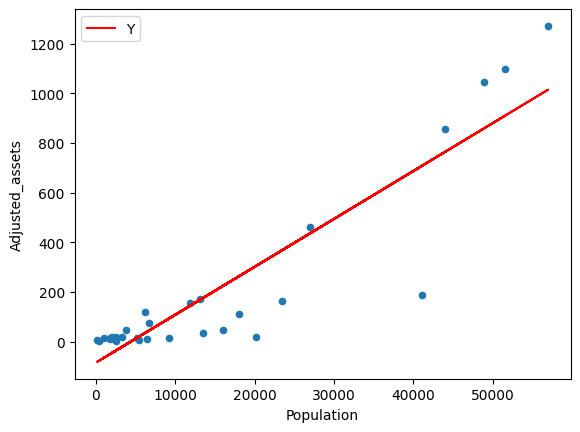

In [35]:

regrAssets = df.plot.scatter(x = 'Population', y = 'Adjusted_assets')
df.plot(x = 'Population', y = 'Y', color = 'red', ax=regrAssets)




### Part b

Finally, use python to find the linear regression model and report it in
appropriate terms (do not just dump the output from python)

I have included the solution below please read through the code.

In [36]:
from sysconfig import get_python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
# get_python_version().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')

In [37]:
#Reading the data (note this is a tab seperated file)
customersData = pd.read_csv('airline_costs.csv')


In [38]:
#Dropping null values
customersData = customersData.dropna()

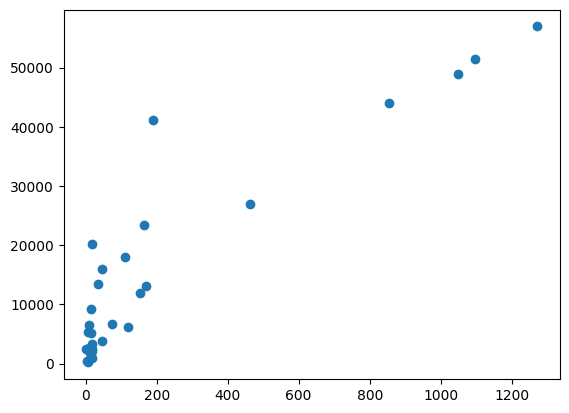

In [39]:
#Scatter plot of time and population
plt.scatter(customersData.Adjusted_assets, customersData.Population)

In [40]:
#Creating X and y and making a linear model
X = customersData[['Population', 'Adjusted_assets']]
X = sm.add_constant(X)
lr_model = sm.OLS(customersData.Adjusted_assets, X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Adjusted_assets   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.221e+31
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:11:56   Log-Likelihood:                 852.09
No. Observations:                  31   AIC:                            -1698.
Df Residuals:                      28   BIC:                            -1694.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.795e-13   7.65e-14     -4.962      0.000   -5.36e-13   -2.23e-13
Population       3.094e-17   7.61e-18      4.066      0.000    1.54e-17    4.65e-17
Adjusted_assets     1.0000   3.58e-16    2.8e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       26.313   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.117
Skew:                          -1.998   Prob(JB):                     5.87e-11
Kurtosis:                       7.528   Cond. No.                     3.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""